In [1]:
# pip install geopy
# pip install folium

In [1]:
# initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
import folium
from IPython.display import display

In [2]:
def memory_usage_only(df):
    #to call: memory_usage_only(df)
    total_memory = df.memory_usage(deep=True).sum()
    print(f"Memory Usage: {total_memory / 1024**2:.2f} MB")

In [3]:
# read csv into dataframe
df = pd.read_csv('credit_card_transactions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## The info table above includes a summary of the columns included: name, number of non-null entries in that column, and datatype.
### Starting out, our dataset contains 1,296,675 rows with 24 columns each. 

In [4]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


### This dataset is a mix of numerical data like transaction amount, latitude/longitude coordinates, and 0/1 booleans, as well as string data like a concatenated transaction date and time value, customer name, and basic demographic data.

In [5]:
df.describe(include="all")

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,...,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,...,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,...,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN,NaN
mean,6.483370e+05,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,...,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,...,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,...,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,...,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,...,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04


### Some of the key columns in the dataset are:
#### is_fraud: a boolean flag for fraudulent transactions (1) vs non fraud (0)
#### Trans_date_trans_time: A datetime stamp for each transaction
#### Amt: the dollar value of the transaction
#### Customer and Merchant Lat/Long: helpful for distance analysis
#### Merchant name and category, customer demographic data (job, DOB, city pop): Potentially useful for predictive modeling

In [6]:
fraud_summary = df['is_fraud'].value_counts()
fraud_summary

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

### We can see that only ~7500 (.58%) of the transactions in the dataset are fraudulent, so there is a much larger representation of non-fraudulent transactions

In [7]:
memory_usage_only(df)

Memory Usage: 1044.88 MB


### On this machine, the dataframe occupies just over 1 GB of memory

# Exploratory Data Analysis
### Transaction Timing: How are transactions distributed by date, time within the day, etc?
### Transaction Value: How are fraud vs non-fraud transactions similar or different in terms of value?
### Transaction Distance: How far is the distance between merchant and customer?
### Merchant Category: Are some transaction categories inherently more risky?

### Transaction Timing: How are transactions distributed by date, time within the day, etc

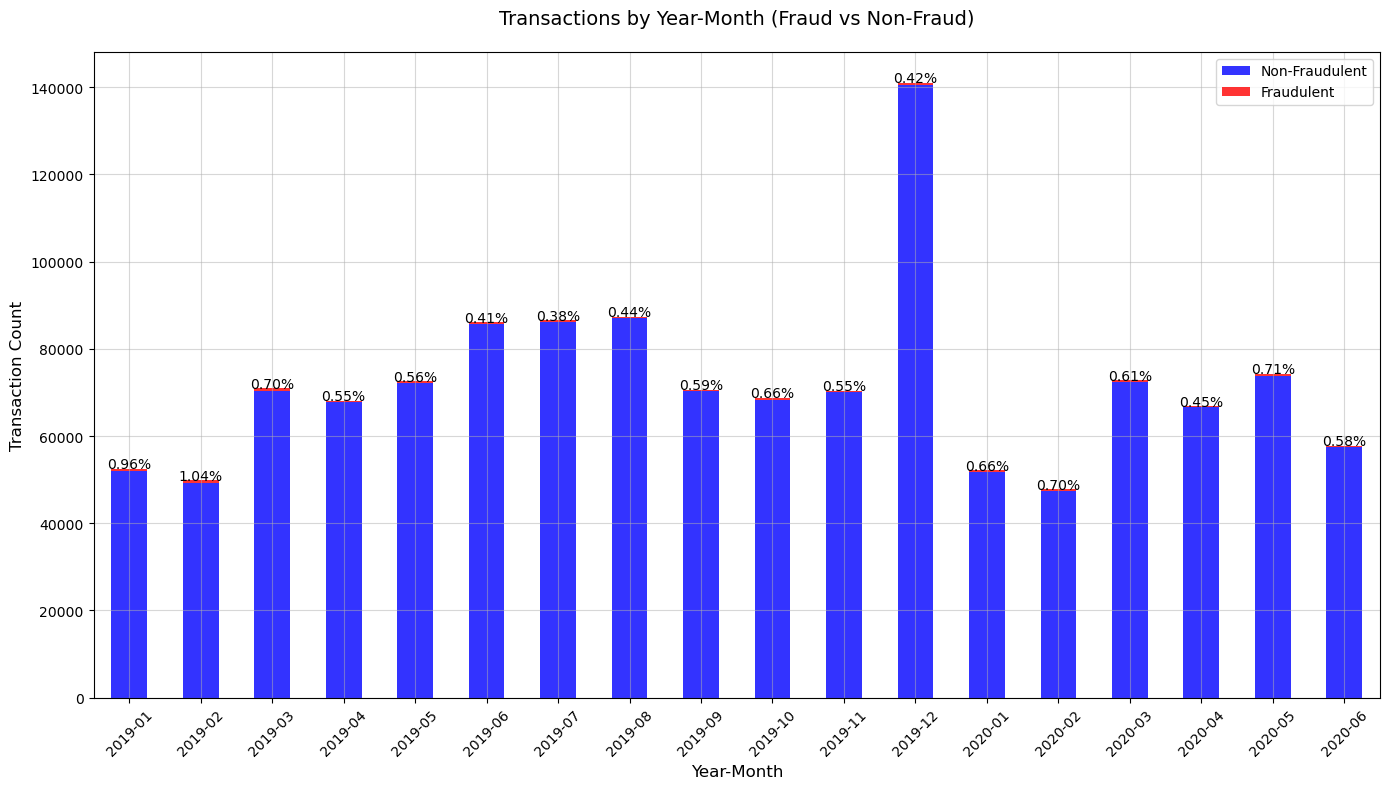

In [11]:
# clean our time data and build helper columms
# convert the 'trans_date_trans_time' column with proper formatting
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='mixed', errors='coerce')

# create the helper columns if successful
conversion_issues = df['trans_date_trans_time'].isna().sum()
if conversion_issues == 0:
    df['transaction_year_month'] = df['trans_date_trans_time'].dt.to_period('M')
    df['transaction_month'] = df['trans_date_trans_time'].dt.month

# group transactions by year-month and fraud status
transactions_by_year_month = df.groupby(['transaction_year_month', 'is_fraud']).size().unstack(fill_value=0)
transactions_by_year_month['Fraud Rate (%)'] = (
    (transactions_by_year_month[1] / (transactions_by_year_month[0] + transactions_by_year_month[1])) * 100
)

# fix `transaction_year_month` index error
transactions_by_year_month.index = transactions_by_year_month.index.astype(str)

# plot it and format for viewing
fig, ax = plt.subplots(figsize=(14, 8))
bars = transactions_by_year_month[[0, 1]].plot(
    kind='bar', stacked=True, color=['blue', 'red'], alpha=0.8, ax=ax
)
ax.set_title('Transactions by Year-Month (Fraud vs Non-Fraud)', fontsize=14, pad=20)
ax.set_xlabel('Year-Month', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)
ax.set_xticks(range(len(transactions_by_year_month.index)))
ax.set_xticklabels(transactions_by_year_month.index, rotation=45)
ax.legend(['Non-Fraudulent', 'Fraudulent'], loc='upper right')
ax.grid(alpha=0.5)

# aad fraud rate callouts on top of the bars
for idx, (name, row) in enumerate(transactions_by_year_month.iterrows()):
    total = row[0] + row[1]
    fraud_rate = row['Fraud Rate (%)']
    ax.text(idx, total + 100, f'{fraud_rate:.2f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

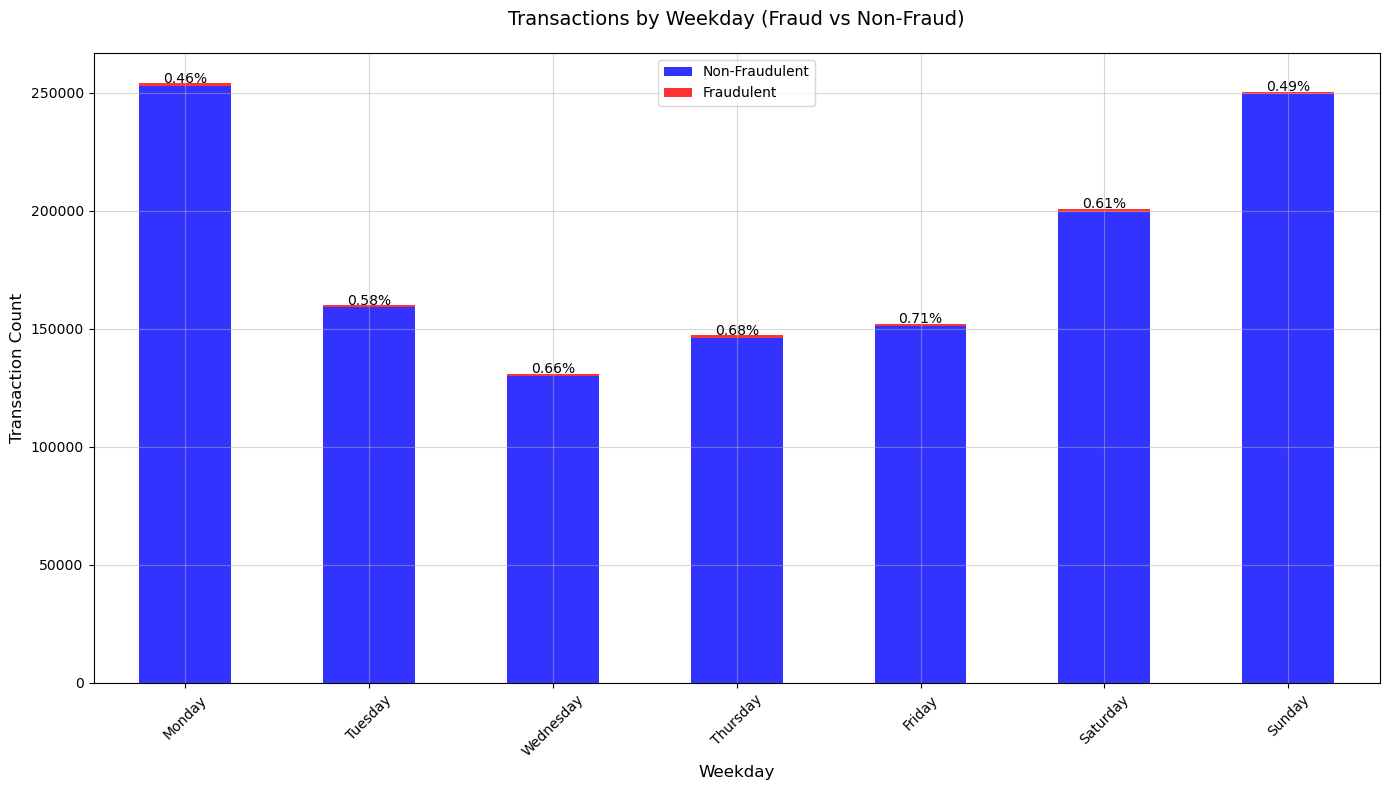

In [14]:
df['transaction_weekday'] = df['trans_date_trans_time'].dt.dayofweek

# group transactions by weekday and fraud status
transactions_by_weekday = df.groupby(['transaction_weekday', 'is_fraud']).size().unstack(fill_value=0)

# calculate fraud rate
transactions_by_weekday['Fraud Rate (%)'] = (
    (transactions_by_weekday[1] / (transactions_by_weekday[0] + transactions_by_weekday[1])) * 100
)

# map weekdays for better readability
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transactions_by_weekday.index = weekday_labels
weekday_mapping = {day: idx for idx, day in enumerate(weekday_labels)}
transactions_by_weekday.index = [weekday_mapping[day] for day in transactions_by_weekday.index]

# plot with numeric weekday indices
fig, ax = plt.subplots(figsize=(14, 8))
transactions_by_weekday[[0, 1]].plot(
    kind='bar', stacked=True, color=['blue', 'red'], alpha=0.8, ax=ax
)
ax.set_title('Transactions by Weekday (Fraud vs Non-Fraud)', fontsize=14, pad=20)
ax.set_xlabel('Weekday', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)
ax.set_xticks(range(len(weekday_labels)))
ax.set_xticklabels(weekday_labels, rotation=45)
ax.legend(['Non-Fraudulent', 'Fraudulent'], loc='upper center')
ax.grid(alpha=0.5)

# add fraud rate callouts on top of the bars
for idx, row in transactions_by_weekday.iterrows():
    total = row[0] + row[1]
    fraud_rate = row['Fraud Rate (%)']
    ax.text(idx, total + 100, f'{fraud_rate:.2f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

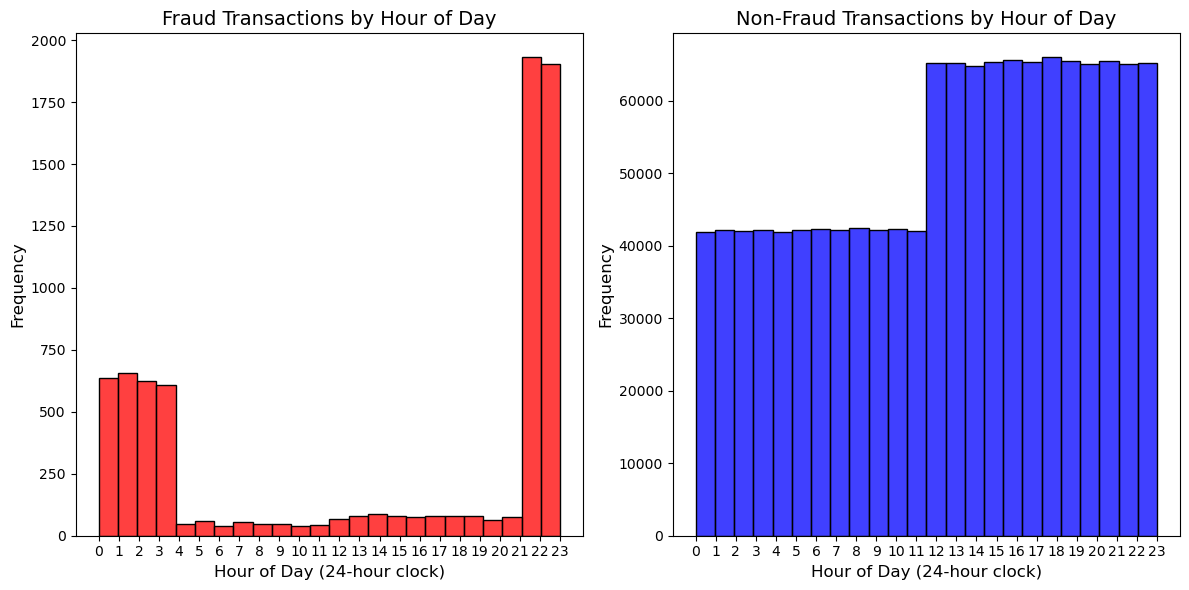

In [15]:
# Ensure 'trans_date_trans_time' is in datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

# Extract the hour from the transaction time
df['hour_of_day'] = df['trans_date_trans_time'].dt.hour

# Create side-by-side histograms for fraud and non-fraud transactions
plt.figure(figsize=(12, 6))

# Fraud transactions
plt.subplot(1, 2, 1)
sns.histplot(df[df['is_fraud'] == 1]['hour_of_day'], bins=24, kde=False, color='red')
plt.title('Fraud Transactions by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day (24-hour clock)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 24))

# Non-fraud transactions
plt.subplot(1, 2, 2)
sns.histplot(df[df['is_fraud'] == 0]['hour_of_day'], bins=24, kde=False, color='blue')
plt.title('Non-Fraud Transactions by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day (24-hour clock)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

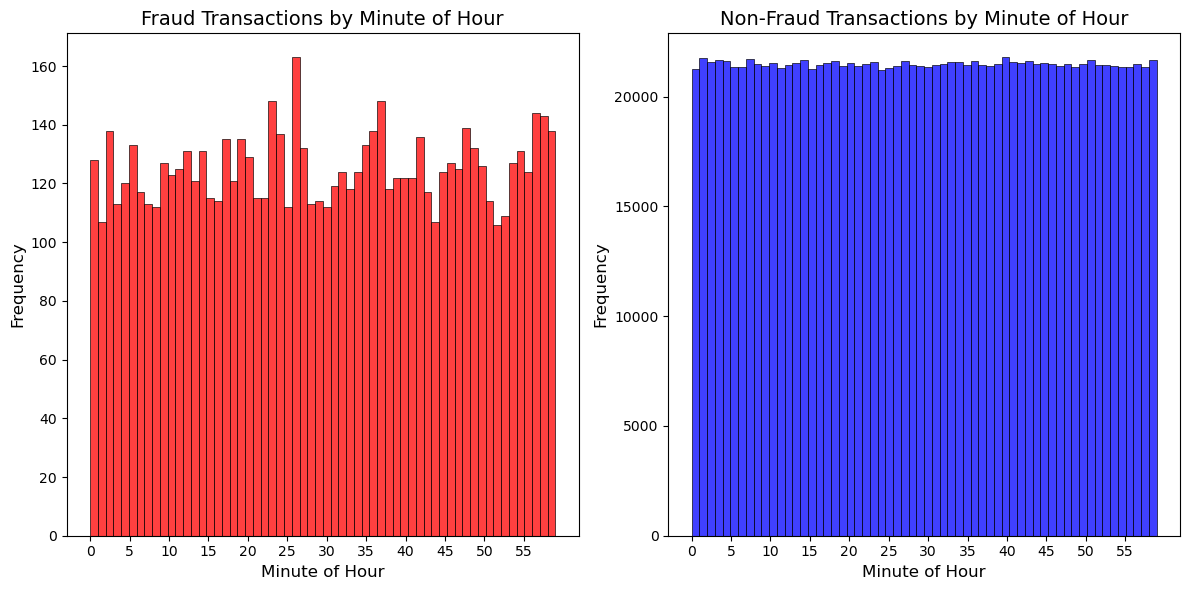

In [16]:
# Extract the minute from the transaction time
df['minute_of_hour'] = df['trans_date_trans_time'].dt.minute

# Create side-by-side histograms for fraud and non-fraud transactions by minute of the hour
plt.figure(figsize=(12, 6))

# Fraud transactions
plt.subplot(1, 2, 1)
sns.histplot(df[df['is_fraud'] == 1]['minute_of_hour'], bins=60, kde=False, color='red')
plt.title('Fraud Transactions by Minute of Hour', fontsize=14)
plt.xlabel('Minute of Hour', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 60, 5))

# Non-fraud transactions
plt.subplot(1, 2, 2)
sns.histplot(df[df['is_fraud'] == 0]['minute_of_hour'], bins=60, kde=False, color='blue')
plt.title('Non-Fraud Transactions by Minute of Hour', fontsize=14)
plt.xlabel('Minute of Hour', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 60, 5))

plt.tight_layout()
plt.show()

### Transaction Value: How are fraud vs non-fraud transactions similar or different in terms of value

## Transaction Value: How are fraud vs non-fraud transactions similar or different in terms of value
### Based on our dataframe description above, we know transaction values are centered around 5 dollars, but they have a large right-tail of outliers maxing out over 28K dollars

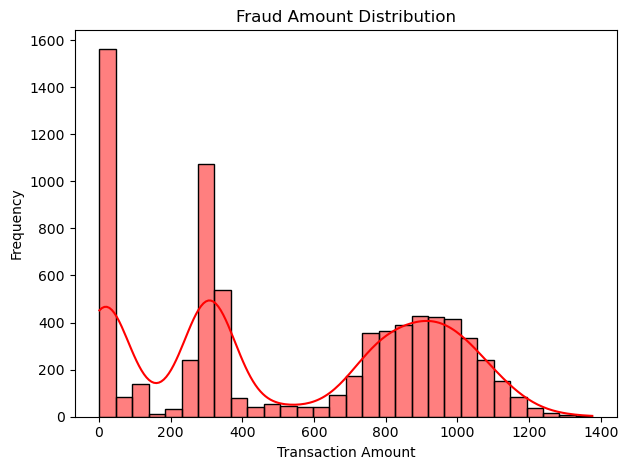

In [17]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html
# plot fraud and non-fraud distributions for 'amt'

# fraud bucket == 1
sns.histplot(df[df['is_fraud'] == 1]['amt'], bins=30, kde=True, color='red')
plt.title('Fraud Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

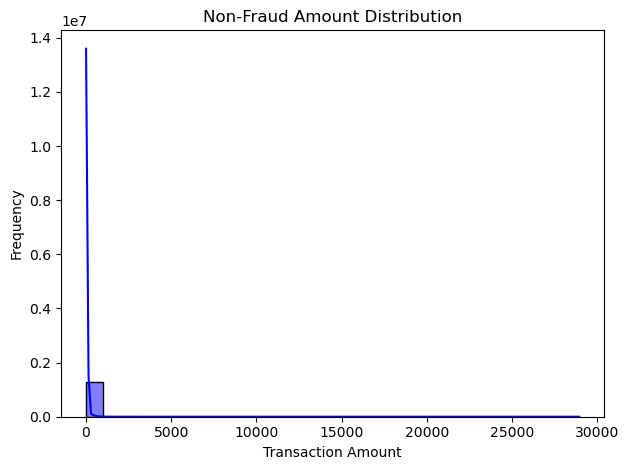

In [18]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html
# plot fraud and non-fraud distributions for 'amt'

# non-fraud bucket == 0
sns.histplot(df[df['is_fraud'] == 0]['amt'], bins=30, kde=True, color='blue')
plt.title('Non-Fraud Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

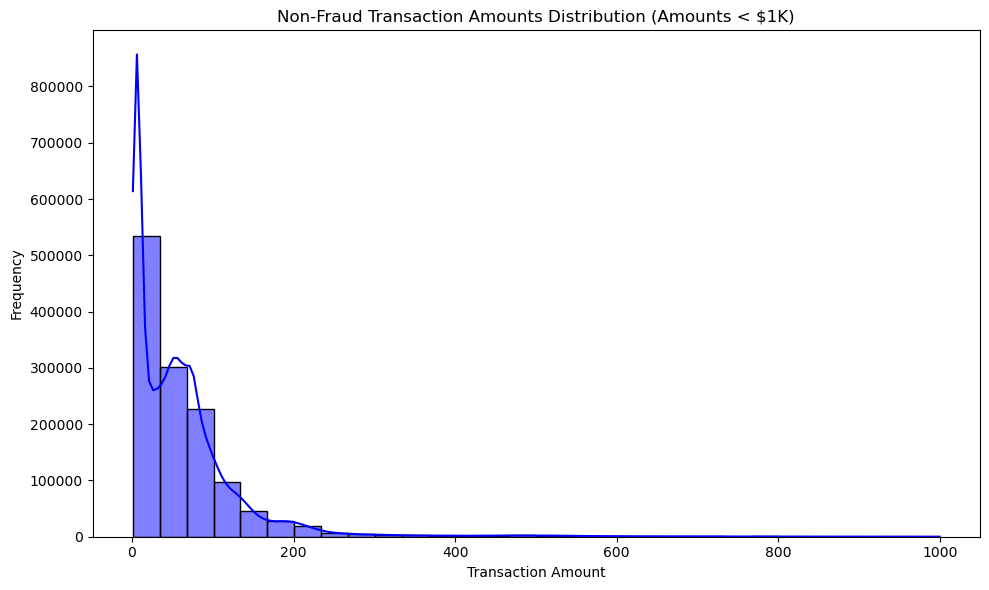

In [19]:
# filter the dataset for non-fraud transactions with amounts less than $1,000
filtered_non_fraud = df[(df['is_fraud'] == 0) & (df['amt'] < 1000)]

# Plot the distribution of transaction amounts for the non-fraud bucket
plt.figure(figsize=(10, 6))
sns.histplot(filtered_non_fraud['amt'], bins=30, kde=True, color='blue')
plt.title('Non-Fraud Transaction Amounts Distribution (Amounts < $1K)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### With the outliers removed, it is clear there is a very different distribution of transaction value for fraudulent transactions when compared to non-fraudulent transactions. Plotting them together makes this more apparent. 

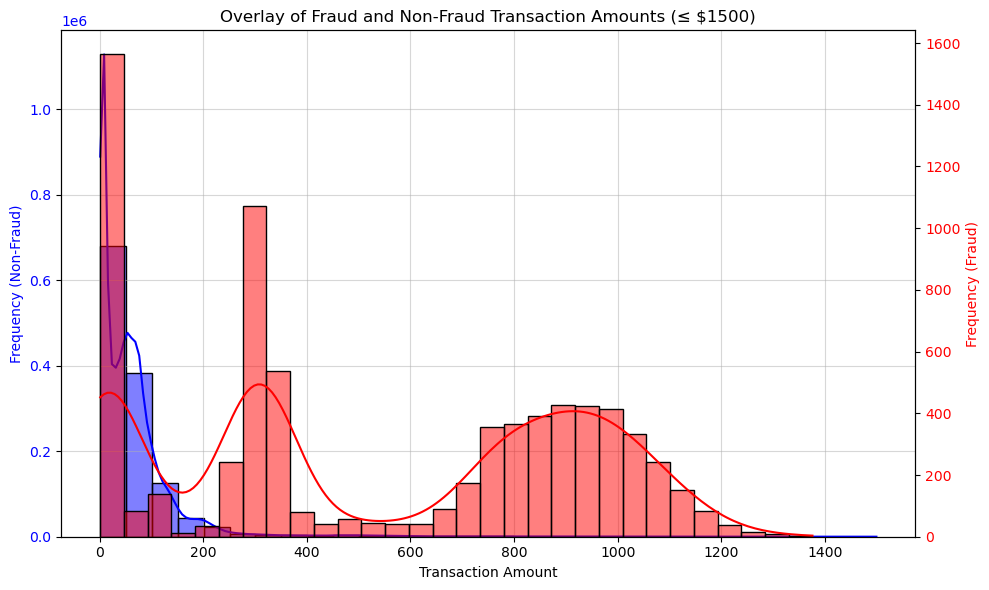

In [20]:
# filter data for amounts $1500 or less
filtered_data = df[df['amt'] <= 1500]

# split the data into fraud and non-fraud transactions
non_fraud = filtered_data[filtered_data['is_fraud'] == 0]
fraud = filtered_data[filtered_data['is_fraud'] == 1]

# create the overlay plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot Non-Fraud transactions on the primary y-axis
sns.histplot(non_fraud['amt'], bins=30, kde=True, color='blue', ax=ax1, label='Non-Fraud')
ax1.set_xlabel('Transaction Amount')
ax1.set_ylabel('Frequency (Non-Fraud)', color='blue')
ax1.grid(alpha=0.5)
ax1.tick_params(axis='y', labelcolor='blue')

# create a secondary y-axis for Fraud transactions
ax2 = ax1.twinx()
sns.histplot(fraud['amt'], bins=30, kde=True, color='red', ax=ax2, label='Fraud')
ax2.set_ylabel('Frequency (Fraud)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# add a title and legend
plt.title('Overlay of Fraud and Non-Fraud Transaction Amounts (≤ $1500)')
fig.tight_layout()
plt.show()

### Based on the chart above, it may be advantageous to create a transaction value flag, particularly for transactions between 200 and 400 dollars, and ~650 to 1200 dollars. These transactions values have significantly higher probabilities of being fraudulent than non-fraudulent. We will explore this later in our feature flag generation.

## Transaction Distance between merchant and customer
### Lets review if the fraud rate changes for different distances between the merchant and customer

In [22]:
# make transaction time in datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# distance calc/flags
def calculate_distance(row):
    customer_coords = (row['lat'], row['long'])
    merchant_coords = (row['merch_lat'], row['merch_long'])
    return geodesic(customer_coords, merchant_coords).km

# add additional column
df['distance_km'] = df.apply(calculate_distance, axis=1)

# add a flag for non local transactions
df['not_local'] = df['distance_km'].apply(lambda x: 1 if x > 50 else 0)

# add distance category
def categorize_distance(distance):
    if distance <= 10:
        return 'Local'
    elif distance <= 50:
        return 'Regional'
    else:
        return 'Long Distance'

df['distance_category'] = df['distance_km'].apply(categorize_distance)

# fraud Rate by Distance Category
fraud_rate_by_distance = df.groupby('distance_category')['is_fraud'].mean() * 100
print(fraud_rate_by_distance)

distance_category
Local            0.511654
Long Distance    0.583517
Regional         0.562794
Name: is_fraud, dtype: float64


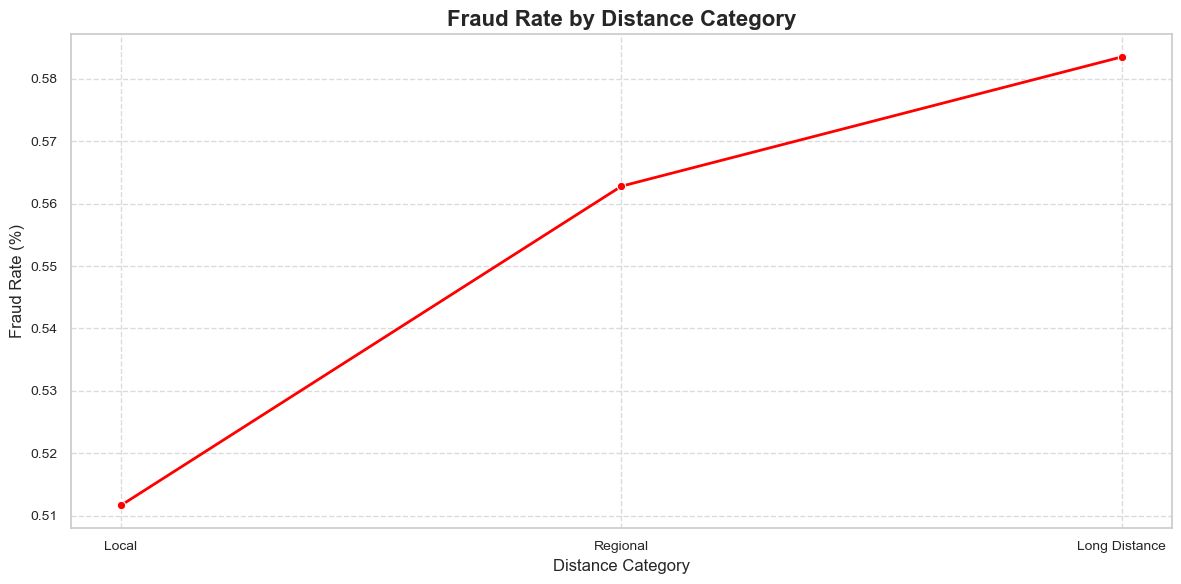

In [23]:
###fraud rate vs distance  
#theme set
sns.set_theme(style="whitegrid")

#categorize distance with an order
distance_order = ['Local', 'Regional', 'Long Distance']
df['distance_category'] = pd.Categorical(
    df['distance_category'], categories=distance_order, ordered=True
)

#fraud rate by distance subcat
fraud_rate_by_distance = df.groupby('distance_category', observed=False)['is_fraud'].mean() * 100

#plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=fraud_rate_by_distance, marker='o', color='red', linewidth=2)

#labels and such
plt.title('Fraud Rate by Distance Category', fontsize=16, fontweight='bold')
plt.xlabel('Distance Category', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Transaction Distance between merchant and customer¶

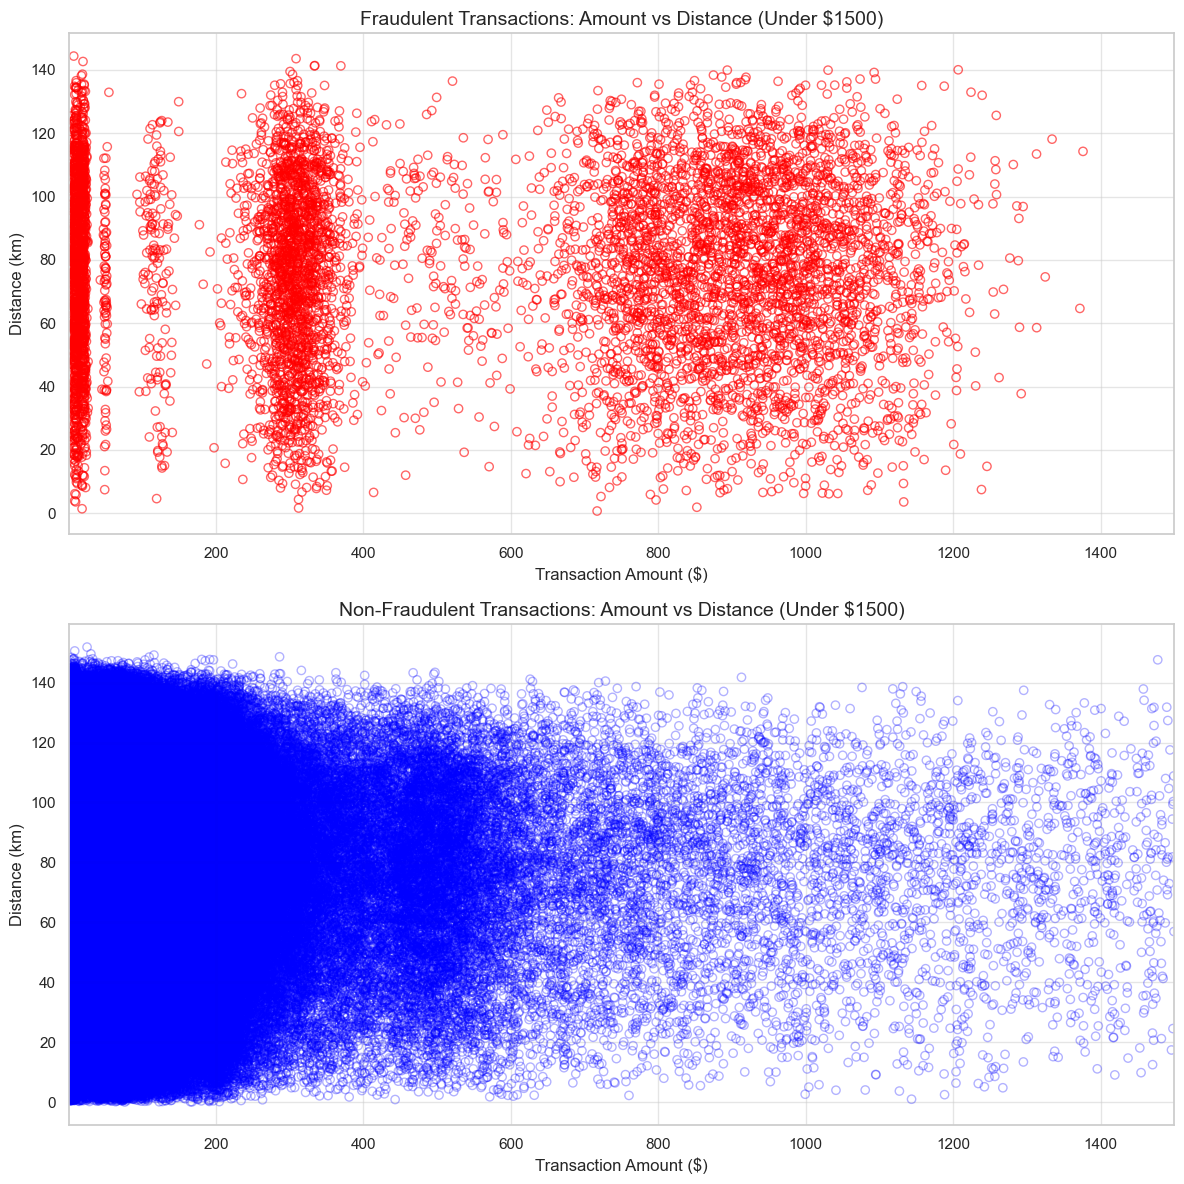

In [24]:
# filter for transactions under $1500 to remove outliers in non-fraud set
filtered_data = df[df['amt'] < 1500]
filtered_fraud_transactions = filtered_data[filtered_data['is_fraud'] == 1]
filtered_non_fraud_transactions = filtered_data[filtered_data['is_fraud'] == 0]
x_min, x_max = filtered_data['amt'].min(), filtered_data['amt'].max()
plt.figure(figsize=(12, 12))

# fraudulent transactions plot
plt.subplot(2, 1, 1)
plt.scatter(
    filtered_fraud_transactions['amt'],
    filtered_fraud_transactions['distance_km'],
    color='red',
    alpha=0.6,
    label='Fraudulent Transactions',
    marker='o',
    facecolors='none'
)
plt.title('Fraudulent Transactions: Amount vs Distance (Under $1500)', fontsize=14)
plt.xlabel('Transaction Amount ($)', fontsize=12)
plt.ylabel('Distance (km)', fontsize=12)
plt.xlim(x_min, x_max)  # set x-axis range
plt.grid(alpha=0.5)

# non-fraudulent  plot
plt.subplot(2, 1, 2)
plt.scatter(
    filtered_non_fraud_transactions['amt'],
    filtered_non_fraud_transactions['distance_km'],
    color='blue',
    alpha=0.3,
    label='Non-Fraudulent Transactions',
    marker='o',
    facecolors='none'
)
plt.title('Non-Fraudulent Transactions: Amount vs Distance (Under $1500)', fontsize=14)
plt.xlabel('Transaction Amount ($)', fontsize=12)
plt.ylabel('Distance (km)', fontsize=12)
plt.xlim(x_min, x_max)  # set x-axis range
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

## Merchant Category

### We can see a slight increase in fraud rate as distance between merchant and customer increases, which may be driven by the cluster of transactions present between 250-350 dollars, and between 650-1200 dollars. The distance flag and price clusters may be useful features to add later.

### Merchant Category

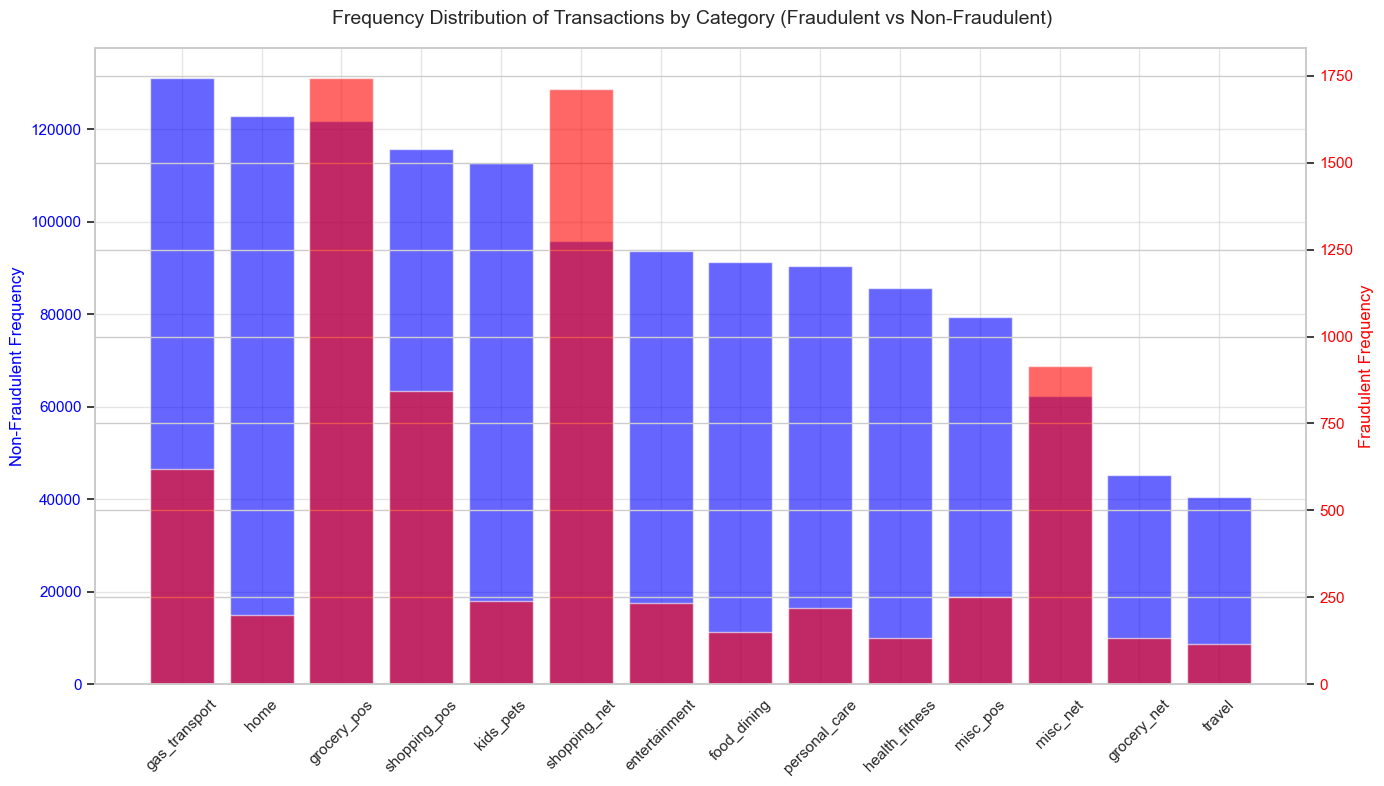

In [25]:
# count the frequency of each category for fraud and non-fraud transactions
fraud_category_counts = df[df['is_fraud'] == 1]['category'].value_counts()
non_fraud_category_counts = df[df['is_fraud'] == 0]['category'].value_counts()

# plot the frequency distributions on different axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# non-fraudulent transactions
ax1.bar(non_fraud_category_counts.index, non_fraud_category_counts.values, alpha=0.6, label='Non-Fraudulent Transactions', color='blue')
ax1.set_ylabel('Non-Fraudulent Frequency', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.5)

# secondary y-axis for fraudulent transactions
ax2 = ax1.twinx()
ax2.bar(fraud_category_counts.index, fraud_category_counts.values, alpha=0.6, label='Fraudulent Transactions', color='red')
ax2.set_ylabel('Fraudulent Frequency', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Frequency Distribution of Transactions by Category (Fraudulent vs Non-Fraudulent)', fontsize=14)
fig.tight_layout()
plt.show()

# Features Flags to Create:

### Transaction value flag for amounts between 200-400 and 650-1200

In [26]:
# function to encode transaction amount risk
def encode_transaction_risk(amount):
    if (250 <= amount <= 400) or (650 <= amount <= 1200):
        return 2  # High Risk
    elif (100 <= amount < 250) or (400 < amount < 650):
        return 1  # Medium Risk
    else:
        return 0  # Normal Risk

df['transaction_value_risk_encoded'] = df['amt'].apply(encode_transaction_risk)

### High/Medium/Low risk based on fraud hour

In [27]:
# function to encode transaction time risk
def encode_time_risk(hour):
    if 22 <= hour <= 23:  # high risk between 22:00 and 23:59
        return 2  # high Risk
    elif 0 <= hour <= 4:  # medium risk between 00:00 and 04:59
        return 1  # medium Risk
    else:  # low risk for the rest of the day
        return 0  # low Risk

if 'trans_date_trans_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['trans_date_trans_time']):
    df['transaction_time_risk_encoded'] = df['hour_of_day'].apply(encode_time_risk)

# df[['hour', 'transaction_time_risk_encoded']].head()

## Merchant category = gas_transport, grocery_pos, shopping_net, smisc_net

In [28]:
# list of high-risk categories
high_risk_categories = ['gas_transport', 'grocery_pos', 'shopping_net', 'shopping_pos', 'misc_net']

# flag transactions in these categories
df['category_risk'] = df['category'].apply(lambda x: 1 if x in high_risk_categories else 0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 35 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Unnamed: 0                      1296675 non-null  int64         
 1   trans_date_trans_time           1296675 non-null  datetime64[ns]
 2   cc_num                          1296675 non-null  int64         
 3   merchant                        1296675 non-null  object        
 4   category                        1296675 non-null  object        
 5   amt                             1296675 non-null  float64       
 6   first                           1296675 non-null  object        
 7   last                            1296675 non-null  object        
 8   gender                          1296675 non-null  object        
 9   street                          1296675 non-null  object        
 10  city                            1296675 no

In [ ]:
#geospatial Visualization
def create_transaction_map(data, fraud_only=False, max_points=25000):
    #center the map at the average lat/long (basically get map of usa) 
    map_center = [data['lat'].mean(), data['long'].mean()]
    transaction_map = folium.Map(location=map_center, zoom_start=6)

    #filter for fraud only data 
    if fraud_only:
        data = data[data['is_fraud'] == 1]

    #limit number of points to visualize
    if len(data) > max_points:
        data = data.sample(n=max_points, random_state=42)

    #+ each transaction as a circle marker to be visible on the map
    for _, row in data.iterrows():
        location = [row['lat'], row['long']]
        popup_text = f"""
        ID: {row['Unnamed: 0']}<br>
        Amount: ${row['amt']:.2f}<br>
        Fraud: {'Yes' if row['is_fraud'] else 'No'}<br>
        Local Transaction: {'No' if row['not_local'] else 'Yes'}
        """
        color = 'red' if row['is_fraud'] else 'green'
        folium.CircleMarker(
            location=location,
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=popup_text,
        ).add_to(transaction_map)

    return transaction_map

transaction_map = create_transaction_map(df, fraud_only=False, max_points=25000)  
display(transaction_map)

# At this point we have a number of different datapoints to evaluate for correlations. We need to normalize/standardize our non numeric inputs for better correlation analysis and easier predictive model application

In [31]:
# Define a function to extract transaction year and calculate age
def extract_year_and_calculate_age(df):
    """
    Adds columns for transaction year and calculates age at the time of transaction.

    Parameters:
    - df (pd.DataFrame): The input dataframe with 'dob' and 'trans_date_trans_time' columns.

    Returns:
    - pd.DataFrame: The dataframe with two new columns:
        - transaction_year: The year of the transaction.
        - age_at_transaction: The age of the customer at the time of transaction.
    """
    # Ensure 'trans_date_trans_time' is string and extract transaction year
    df['transaction_year'] = df['trans_date_trans_time'].astype(str).str[:4].astype(int)

    # Function to calculate age based on dob and transaction year
    def calculate_age(dob, transaction_year):
        dob_year = int(str(dob)[:4])  # Extract the year from dob
        age = transaction_year - dob_year
        return age

    # Apply the calculate_age function row-wise
    df['age_at_transaction'] = df.apply(lambda row: calculate_age(row['dob'], row['transaction_year']), axis=1)

    return df

# Apply the combined function to the dataframe
df = extract_year_and_calculate_age(df)

# Display the first few rows to verify the new columns
df[['dob', 'trans_date_trans_time', 'transaction_year', 'age_at_transaction']].head()

,dob,trans_date_trans_time,transaction_year,age_at_transaction
0,1988-03-09,2019-01-01 00:00:18,2019,31
1,1978-06-21,2019-01-01 00:00:44,2019,41
2,1962-01-19,2019-01-01 00:00:51,2019,57
3,1967-01-12,2019-01-01 00:01:16,2019,52
4,1986-03-28,2019-01-01 00:03:06,2019,33


In [33]:
# function for encoding gender
def encode_gender(df):
    gender_mapping = {'F': 0, 'M': 1}
    df['gender_encoded'] = df['gender'].map(gender_mapping)
    return df
df = encode_gender(df)

In [34]:
# perform correlation analysis
numerical_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_columns].corr()

# return the correlation matrix for further use
correlation_matrix.head()
# calculate correlation of all numerical columns with 'is_fraud'
fraud_correlation = df[numerical_columns].corr()['is_fraud'].sort_values(ascending=False)
fraud_correlation

is_fraud                          1.000000
transaction_value_risk_encoded    0.220292
amt                               0.219404
transaction_time_risk_encoded     0.114306
category_risk                     0.056776
hour_of_day                       0.013799
age_at_transaction                0.012453
gender_encoded                    0.007642
transaction_year                  0.003004
city_pop                          0.002136
lat                               0.001894
merch_lat                         0.001741
transaction_weekday               0.001739
merch_long                        0.001721
long                              0.001721
not_local                         0.001210
minute_of_hour                    0.001033
distance_km                       0.000404
cc_num                           -0.000981
zip                              -0.002162
merch_zipcode                    -0.002992
Unnamed: 0                       -0.004767
unix_time                        -0.005078
transaction

# Data Cleaning

## By now we have scrubbed our data and find the important columns that we'd like to hold onto for further analysis. Now we can start to clean-up our data and reduce computation overhead.

### This dataset contains a credit card number associated with each transaction, but these card numbers have been anonymized and hashed to protect user privacy. Since they are randomized, we can remove them from the dataset to reduce memory usage.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 38 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Unnamed: 0                      1296675 non-null  int64         
 1   trans_date_trans_time           1296675 non-null  datetime64[ns]
 2   cc_num                          1296675 non-null  int64         
 3   merchant                        1296675 non-null  object        
 4   category                        1296675 non-null  object        
 5   amt                             1296675 non-null  float64       
 6   first                           1296675 non-null  object        
 7   last                            1296675 non-null  object        
 8   gender                          1296675 non-null  object        
 9   street                          1296675 non-null  object        
 10  city                            1296675 no

In [36]:
memory_usage_only(df)

Memory Usage: 1075.80 MB


In [37]:
df.drop(['cc_num', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'dob', 'distance_category', 'job', 'trans_num', 'unix_time', 'merch_zipcode'], axis = 1, inplace = True)

In [38]:
memory_usage_only(df)

Memory Usage: 192.91 MB


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Unnamed: 0                      1296675 non-null  int64         
 1   trans_date_trans_time           1296675 non-null  datetime64[ns]
 2   amt                             1296675 non-null  float64       
 3   lat                             1296675 non-null  float64       
 4   long                            1296675 non-null  float64       
 5   city_pop                        1296675 non-null  int64         
 6   merch_lat                       1296675 non-null  float64       
 7   merch_long                      1296675 non-null  float64       
 8   is_fraud                        1296675 non-null  int64         
 9   transaction_year_month          1296675 non-null  period[M]     
 10  transaction_month               1296675 no

In [40]:
#set up machine learning 
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import shap

In [41]:
#normalize distance and amount 
scaler = MinMaxScaler()
df[['distance_km_normalized', 'amt_normalized']] = scaler.fit_transform(df[['distance_km', 'amt']])

#new feature matrix to track
X = df[['distance_km_normalized', 'not_local', 'amt_normalized', 'transaction_value_risk_encoded', 'transaction_time_risk_encoded', 'category_risk', 'age_at_transaction', 'gender_encoded']]
y = df['is_fraud']

#use SMOTE to balance the data 
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

#use the feature engineering from above + new 
df['amt_per_distance'] = df['amt'] / (df['distance_km'] + 1e-6)  # Avoid division by zero
df['is_weekend'] = df['trans_date_trans_time'].dt.dayofweek >= 5

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

#start to train and make models optimized 
#random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

#gradient boosting model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_xgb_pred = xgb_model.predict(X_test)

#logistic regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)
y_logreg_pred = logreg_model.predict(X_test)

#evaluate performance and show scores 
print("Random Forest:")
print(classification_report(y_test, y_rf_pred))
print("XGBoost:")
print(classification_report(y_test, y_xgb_pred))
print("Logistic Regression:")
print(classification_report(y_test, y_logreg_pred))

#determine  ROC-AUC
rf_roc_auc      = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
xgb_roc_auc     = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
logreg_roc_auc  = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])

print(f"ROC-AUC Scores: RF={rf_roc_auc}, XGB={xgb_roc_auc}, LogReg={logreg_roc_auc}")

#model with SHAP
X_test_sample = X_test.sample(n=100, random_state=42)

#ensure sameple is a dataframe
if not isinstance(X_test_sample, pd.DataFrame):
    X_test_sample = pd.DataFrame(X_test_sample, columns=X_test.columns)

#use a treeExplainer for the random forest model
explainer = shap.TreeExplainer(rf_model)

#SHAP values for the test sample
shap_values = explainer.shap_values(X_test_sample)

#debugging
#print(f"Shape of SHAP values: {shap_values[1].shape}")
#print(f"Shape of X_test_sample: {X_test_sample.shape}")

#still having bugginess here and trying to determine why (just not building and killin the kernal)
# plot the SHAP summary for the fraud detection output 
#shap.summary_plot(shap_values[1], X_test_sample)

Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    257186
           1       0.98      0.99      0.99    258482

    accuracy                           0.99    515668
   macro avg       0.99      0.99      0.99    515668
weighted avg       0.99      0.99      0.99    515668

XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    257186
           1       0.96      0.96      0.96    258482

    accuracy                           0.96    515668
   macro avg       0.96      0.96      0.96    515668
weighted avg       0.96      0.96      0.96    515668

Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85    257186
           1       0.85      0.86      0.86    258482

    accuracy                           0.85    515668
   macro avg       0.85      0.85      0.85    515668
weighted avg       0.85      

# END

## Backup

In [41]:
# #normalize distance and amount 
# scaler = MinMaxScaler()
# df[['distance_km_normalized', 'amt_normalized']] = scaler.fit_transform(df[['distance_km', 'amt']])

# #new feature matrix to track
# X = df[['distance_km_normalized', 'not_local', 'amt_normalized']]
# y = df['is_fraud']

# #use SMOTE to balance the data 
# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X, y)

# #use the feature engineering from above + new 
# df['amt_per_distance'] = df['amt'] / (df['distance_km'] + 1e-6)  # Avoid division by zero
# df['is_weekend'] = df['trans_date_trans_time'].dt.dayofweek >= 5

# # Step 3: Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# #start to train and make models optimized 
# #random Forest Model
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)
# y_rf_pred = rf_model.predict(X_test)

# #gradient boosting model
# xgb_model = XGBClassifier(random_state=42)
# xgb_model.fit(X_train, y_train)
# y_xgb_pred = xgb_model.predict(X_test)

# #logistic regression model
# logreg_model = LogisticRegression(random_state=42, max_iter=1000)
# logreg_model.fit(X_train, y_train)
# y_logreg_pred = logreg_model.predict(X_test)

# #evaluate performance and show scores 
# print("Random Forest:")
# print(classification_report(y_test, y_rf_pred))
# print("XGBoost:")
# print(classification_report(y_test, y_xgb_pred))
# print("Logistic Regression:")
# print(classification_report(y_test, y_logreg_pred))

# #determine  ROC-AUC
# rf_roc_auc      = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
# xgb_roc_auc     = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
# logreg_roc_auc  = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])

# print(f"ROC-AUC Scores: RF={rf_roc_auc}, XGB={xgb_roc_auc}, LogReg={logreg_roc_auc}")

# #model with SHAP
# X_test_sample = X_test.sample(n=100, random_state=42)

# #ensure sameple is a dataframe
# if not isinstance(X_test_sample, pd.DataFrame):
#     X_test_sample = pd.DataFrame(X_test_sample, columns=X_test.columns)

# #use a treeExplainer for the random forest model
# explainer = shap.TreeExplainer(rf_model)

# #SHAP values for the test sample
# shap_values = explainer.shap_values(X_test_sample)

# #debugging
# #print(f"Shape of SHAP values: {shap_values[1].shape}")
# #print(f"Shape of X_test_sample: {X_test_sample.shape}")

# #still having bugginess here and trying to determine why (just not building and killin the kernal)
# # plot the SHAP summary for the fraud detection output 
# #shap.summary_plot(shap_values[1], X_test_sample)

Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97    257186
           1       0.96      0.97      0.97    258482

    accuracy                           0.97    515668
   macro avg       0.97      0.97      0.97    515668
weighted avg       0.97      0.97      0.97    515668

XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93    257186
           1       0.94      0.92      0.93    258482

    accuracy                           0.93    515668
   macro avg       0.93      0.93      0.93    515668
weighted avg       0.93      0.93      0.93    515668

Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    257186
           1       0.87      0.87      0.87    258482

    accuracy                           0.87    515668
   macro avg       0.87      0.87      0.87    515668
weighted avg       0.87      

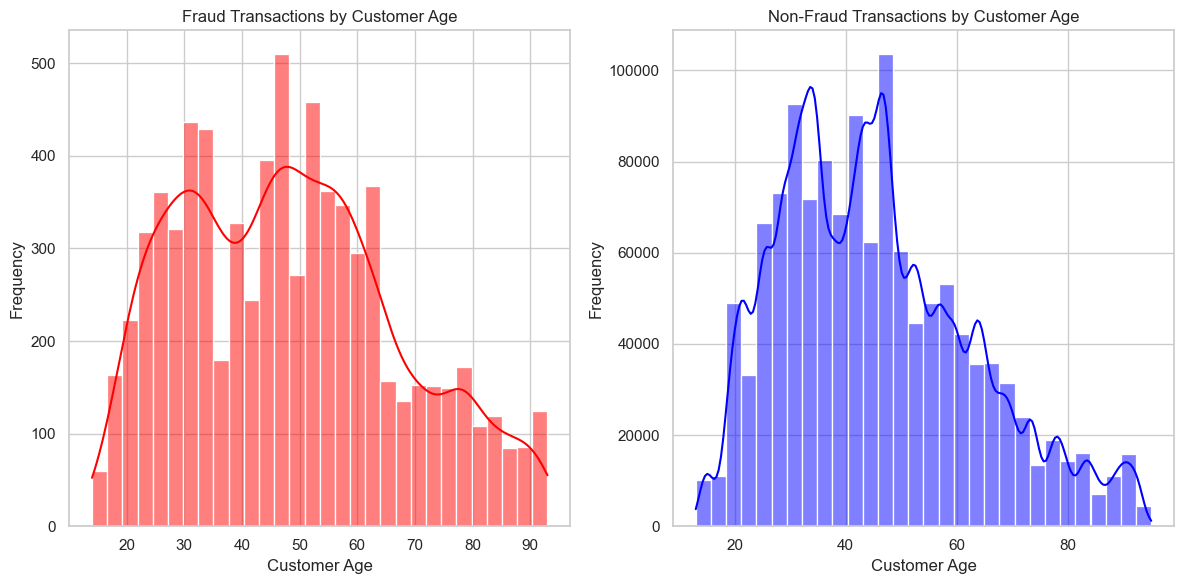

In [69]:
# # https://seaborn.pydata.org/generated/seaborn.histplot.html
# # check 'dob' column is in datetime format
# df['dob'] = pd.to_datetime(df['dob'])

# # calculate customer age at the time of the transaction
# df['customer_age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# # adjust for transactions before the customer's birthday
# df['customer_age'] -= (df['trans_date_trans_time'].dt.month < df['dob'].dt.month) | \
#                         ((df['trans_date_trans_time'].dt.month == df['dob'].dt.month) & 
#                          (df['trans_date_trans_time'].dt.day < df['dob'].dt.day))

# # plot fraud and non-fraud distributions for customer age
# plt.figure(figsize=(12, 6))

# # fraud transactions
# plt.subplot(1, 2, 1)
# sns.histplot(df[df['is_fraud'] == 1]['customer_age'], bins=30, kde=True, color='red')
# plt.title('Fraud Transactions by Customer Age')
# plt.xlabel('Customer Age')
# plt.ylabel('Frequency')

# # non-fraud transactions
# plt.subplot(1, 2, 2)
# sns.histplot(df[df['is_fraud'] == 0]['customer_age'], bins=30, kde=True, color='blue')
# plt.title('Non-Fraud Transactions by Customer Age')
# plt.xlabel('Customer Age')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

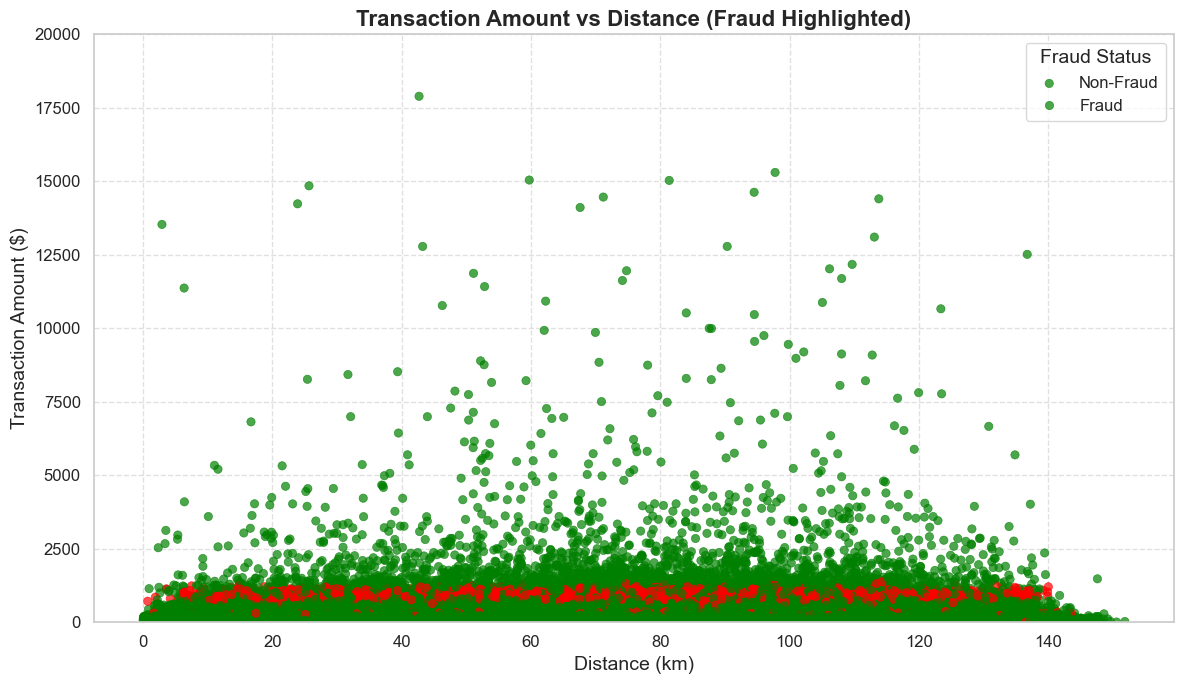

In [73]:
# #scatter plot for transaction Amount vs Distance
# sns.set_theme(style="whitegrid")

# #basic scatter plot
# plt.figure(figsize=(12, 7))
# scatter = sns.scatterplot(
#     data=df,
#     x='distance_km',
#     y='amt',
#     hue='is_fraud',
#     palette={0: 'green', 1: 'red'},
#     alpha=0.7,  # Add transparency for overlapping points
#     edgecolor=None
# )

# #labels and such 
# plt.title('Transaction Amount vs Distance (Fraud Highlighted)', fontsize=16, fontweight='bold')
# plt.xlabel('Distance (km)', fontsize=14)
# plt.ylabel('Transaction Amount ($)', fontsize=14)
# #limit transaction amount to $20000 (only lose a few points and none are fraud) 
# plt.ylim(0, 20000)  
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# #legend
# legend = plt.legend(
#     title='Fraud Status',
#     labels=['Non-Fraud', 'Fraud'],
#     fontsize=12,
#     title_fontsize=14,
#     loc='upper right',
#     frameon=True
# )
# legend.get_frame().set_alpha(0.75) 

# # Add gridlines for readability
# plt.grid(visible=True, linestyle='--', alpha=0.6)

# # Show the plot
# plt.tight_layout()
# plt.show()